In [19]:
import pandas as pd
from pathlib import Path
from Bio import Phylo
import io
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [3]:
ROOT = Path().cwd()
RUN = "18_06_24"
DATA = (ROOT / f"../total_seq_data/{RUN}/bracken/").resolve()
DATA_DOMAIN = (ROOT / f"../total_seq_data/{RUN}/bracken_domain/").resolve()

In [70]:
DATA = Path("/export/data/agletdinov/hackathon_itmo/WGS_project/results/bracken_from_2").resolve()

In [21]:
to_df = Path("../ncbi_taxonomy/nodes.dmp")
nodes = pd.read_csv(to_df, sep="\t", header=None, usecols=[0, 2, 4], names=["tax_id", "parent tax_id", "tax_name"], index_col="tax_id")

In [71]:
def create_path_to_root(taxid, nodes):
    try:
        path_to_root = []
        path_to_root.append(taxid)
        parent = nodes.loc[taxid]["parent tax_id"]
        if parent != 1:
            path_to_root.extend(create_path_to_root(parent, nodes))
        return path_to_root
    except:
        return ["None"]

In [72]:
df_dict = {i.stem:pd.read_csv(i, sep="\t") for i in DATA.glob("*.tsv")}

In [73]:
df_dict.keys()

dict_keys(['S250053339_L01_1_bracken_S_mqc', 'S250053339_L01_2_bracken_S_mqc', 'S250053339_L01_3_bracken_S_mqc', 'S250053339_L01_4_bracken_S_mqc', 'S250053339_L01_97_bracken_S_mqc', 'S250053339_L01_98_bracken_S_mqc', 'S250059839_L01_35_bracken_S_mqc', 'S250059839_L01_36_bracken_S_mqc'])

In [74]:
mask = df_dict["S250059839_L01_36_bracken_S_mqc"]["taxonomy_id"].apply(lambda x: 10239 == create_path_to_root(x, nodes)[-1])
df_dict["S250059839_L01_36_bracken_S_mqc"][mask]

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
1071,Skunavirus sv79201,2845180,S,52,161,213,0.00003
1072,Skunavirus CHPC964,2845401,S,30,155,185,0.00003
1073,Skunavirus sv66901,2845179,S,20,54,74,0.00001
1074,Bohxovirus oralis,2955512,S,85,0,85,0.00001
1075,Kahnovirus oralis,2956047,S,23,2,25,0.00000
1076,Lebriduvirus gastrointestinalis,2956106,S,22,0,22,0.00000


In [84]:
df_dict_vir = {}
vir_df_list = []
for sample in df_dict:
    df = df_dict[sample]
    mask = df["taxonomy_id"].apply(lambda x: 10239 == create_path_to_root(x, nodes)[-1])
    df_vir = df[mask][["name", "taxonomy_id", "kraken_assigned_reads"]]
    df_vir["sample"] = ["_".join(sample.split("_")[:3]) for i in range(df_vir.shape[0])]
    vir_df_list.append(df_vir)
    
    df_dict_vir[sample] = df[mask][["name", "taxonomy_id", "kraken_assigned_reads"]]
final_vir_df = pd.concat(vir_df_list).sort_values(by=["sample", "kraken_assigned_reads"], ascending=False)
final_vir_df.to_csv("bracken_vir_concat_mqc.tsv", sep="\t", index=False)

In [83]:
final_vir_df

,name,taxonomy_id,kraken_assigned_reads,sample
1074,Bohxovirus oralis,2955512,85,S250059839_L01_36
1071,Skunavirus sv79201,2845180,52,S250059839_L01_36
1072,Skunavirus CHPC964,2845401,30,S250059839_L01_36
1075,Kahnovirus oralis,2956047,23,S250059839_L01_36
1076,Lebriduvirus gastrointestinalis,2956106,22,S250059839_L01_36
1073,Skunavirus sv66901,2845179,20,S250059839_L01_36
4622,Cohcovirus splanchnicus,2955712,6278,S250053339_L01_98
4637,Kingevirus communis,2956060,4771,S250053339_L01_98
4623,Cohcovirus hiberniae,2955711,2596,S250053339_L01_98
4624,Canhaevirus faecalis,2955578,1001,S250053339_L01_98


In [ ]:
final_vir_df.

In [77]:
HIV2 = []
for sample in df_dict_vir:
    print(sample)
    subdf = df_dict[sample]
    if (subdf["taxonomy_id"] == 11709).sum() != 0:
        HIV2.append(sample)

S250053339_L01_1_bracken_S_mqc
S250053339_L01_2_bracken_S_mqc
S250053339_L01_3_bracken_S_mqc
S250053339_L01_4_bracken_S_mqc
S250053339_L01_97_bracken_S_mqc
S250053339_L01_98_bracken_S_mqc
S250059839_L01_35_bracken_S_mqc
S250059839_L01_36_bracken_S_mqc


In [78]:
HIV2

[]

In [10]:
subdf

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Homo sapiens,9606,S,3936162,1059,3937221,0.75480
1,Prevotella jejuni,1177574,S,522778,47761,570539,0.10938
2,Prevotella melaninogenica,28132,S,63408,10845,74253,0.01423
3,Prevotella intermedia,28131,S,43677,4131,47808,0.00917
4,Prevotella scopos,589437,S,20589,3241,23830,0.00457
...,...,...,...,...,...,...,...
307,Lactococcus phage P680,1262537,S,35,46,81,0.00002
308,Lactococcus virus ASCC191,1165134,S,34,38,72,0.00001
309,Lactococcus virus Bibb29,494269,S,27,38,65,0.00001
310,Lactococcus virus 712,213769,S,22,17,39,0.00001


In [36]:
df_dict_vir = {}
sum_of_contominants = {}
for sample in df_dict:
    try:
        #mask = df_dict[sample]["taxonomy_id"].apply(lambda x: 10239 in create_path_to_root(x, nodes))
        #subdf = df_dict[sample][mask]
        subdf = df_dict[sample]
        sum_of_contominants[sample] = subdf[mask2]["kraken_assigned_reads"].sum()
        df_dict_vir[sample] = subdf[~mask2]
        df_dict[sample][mask].to_csv(DATA / f"../{RUN}/bracken_filt/{sample}_mqc.tsv", sep="\t")
    except:
        continue

In [34]:
df_dict["HERP_001_S9_bracken_S_mqc"].shape

(42, 7)

In [39]:
(DATA / f"../bracken_filt/{sample}_mqc.tsv").resolve()

PosixPath('/export/home/agletdinov/work/git_projects/ncbi_taxonomy/total_seq_data/18_06_24/bracken_filt/HERP_001_S9_bracken_S_mqc_mqc.tsv')

In [43]:
df_dict_vir[sample].sort_values(by="kraken_assigned_reads", ascending=False).to_csv(DATA / f"../bracken_filt/{sample}_filt_mqc.tsv", sep="\t")

In [88]:
sum_of_contominants["p29_Allprep_power_DNA_RNA_kit_nextera_S12_bracken_S_mqc"]

1304

phylum

In [90]:
df_dict_domain = {i.stem:pd.read_csv(i, sep="\t") for i in DATA_DOMAIN.glob("*.tsv")}

In [96]:
df_dict_domain["p29_Allprep_power_DNA_RNA_kit_nextera_S12_bracken_S_mqc"].query("name == 'Viruses'")["kraken_assigned_reads"] - sum_of_contominants["p29_Allprep_power_DNA_RNA_kit_nextera_S12_bracken_S_mqc"]

3    16877
Name: kraken_assigned_reads, dtype: int64

In [109]:
clear_viral_reads = {}
fraction_of_clear_viral_reads = {}
for i in df_dict_domain:
    clear_viral_reads[i] = df_dict_domain[i].query("name == 'Viruses'")["kraken_assigned_reads"] - sum_of_contominants[i]
    
    fraction_of_clear_viral_reads[i] = (clear_viral_reads[i] / df_dict_domain[i]["kraken_assigned_reads"].sum() * 100).values[0]

In [110]:
fraction_of_clear_viral_reads.values()

dict_values([0.1385854611625373, 0.17184883386287325, 0.10519016452965109, 0.21341742576927372, 0.08782764782972827, 0.11784370173754635, 0.12290437641079377, 0.10913770731992634, 0.09392389045629446, 0.10157740784865338, 0.22466317064075192, 0.10460792289685397, 0.08845389462760854])

{'33k_ribo_prep_nextera_S2_bracken_S_mqc': 0.08782764782972827,
 'Undetermined_S0_bracken_S_mqc': 0.08845389462760854,
 'p27_Viral_RNA_mini_kit_nextera_S7_bracken_S_mqc': 0.09392389045629446,
 'p29_Allprep_power_DNA_RNA_kit_nextera_S12_bracken_S_mqc': 0.10157740784865338,
 'p29_Viral_RNA_mini_kit_nextera_S8_bracken_S_mqc': 0.10460792289685397,
 '31k_Viral_RNA_mini_kit_nextera_S5_bracken_S_mqc': 0.10519016452965109,
 'p27_ribo_prep_nextera_S3_bracken_S_mqc': 0.10913770731992634,
 '33k_Viral_RNA_mini_kit_nextera_S6_bracken_S_mqc': 0.11784370173754635,
 'p27_Allprep_power_DNA_RNA_kit_nextera_S11_bracken_S_mqc': 0.12290437641079377,
 '31k_Allprep_power_DNA_RNA_kit_nextera_S9_bracken_S_mqc': 0.1385854611625373,
 '31k_ribo_prep_nextera_S1_bracken_S_mqc': 0.17184883386287325,
 '33k_Allprep_power_DNA_RNA_kit_nextera_S10_bracken_S_mqc': 0.21341742576927372,
 'p29_ribo_prep_nextera_S4_bracken_S_mqc': 0.22466317064075192}

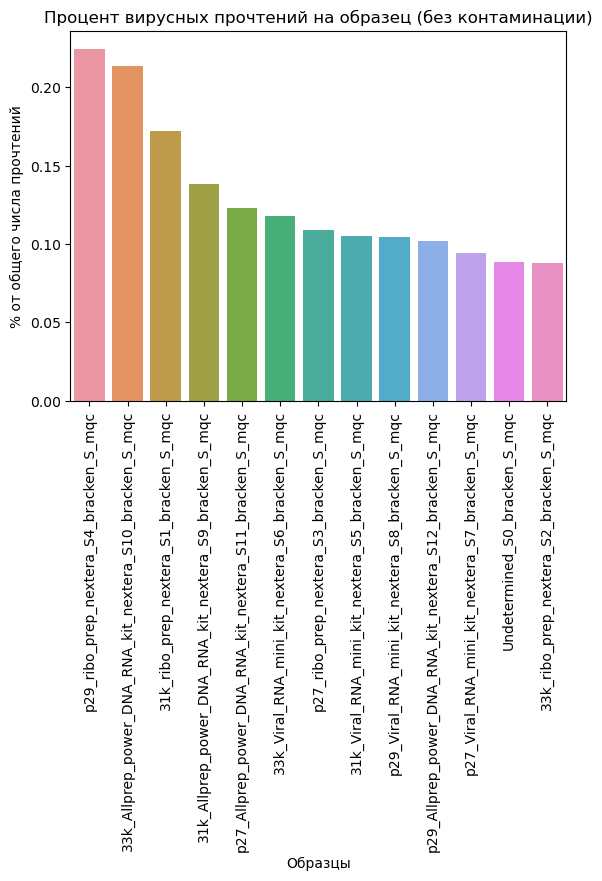

In [128]:
sorted_fraction_of_clear_viral_reads = {k: v for k, v in sorted(fraction_of_clear_viral_reads.items(), key=lambda fraction_of_clear_viral_reads: fraction_of_clear_viral_reads[1], reverse=True)}
sns.barplot(x=list(sorted_fraction_of_clear_viral_reads.keys()), y=list(sorted_fraction_of_clear_viral_reads.values()))
plt.xlabel('Образцы')
plt.ylabel('% от общего числа прочтений')
plt.title('Процент вирусных прочтений на образец (без контаминации)')
plt.xticks(rotation=90)
plt.show()